In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,mean_absolute_error,mean_squared_error
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder

In [5]:
#reading csv file
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.head()

PermissionError: [Errno 13] Permission denied: 'test.csv'

In [6]:
#copying df to data
df = pd.read_csv('train.csv')

In [4]:
#requirements
print('Number of rows: '+ format(df.shape[0]) +', number of features: '+ format(df.shape[1]))

Number of rows: 381109, number of features: 12


In [5]:
#checking for null values
df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [ ]:
#checking for unique values
df.nunique()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [6]:
#converting float64 Dtype columns into int64 Dtype columns
for i in df.columns:
    if (df[i].dtype == 'float64'):
        df[i] = df[i].astype(np.int64)

In [ ]:
#identifying categorical and numerical columns
categorical = []
for i in df.columns:
    if (df[i].dtype == 'object'):
        categorical.append(i)
print(f"Categorical columns are {categorical}.\n")

numerical = []
for i in df.columns:
    if (df[i].dtype == 'int64'):
        numerical.append(i)
print(f"Numerical columns are {numerical}.")

#but the numerical columns aren't always going to be numerical columns just because it is of int datatype
#example - 'Driving_License', 'Region_Code', 'Previously_Insured', 'Policy_Sales_Channel', 'Response' are actually categorical!

In [ ]:
#so categorical -
categorical = ['Gender'
               ,'Driving_License'
               , 'Region_Code'
               , 'Previously_Insured'
               , 'Vehicle_Age'
               , 'Vehicle_Damage'
               ,'Policy_Sales_Channel']

#and numerical -
numerical = ['Age'
            , 'Vintage'
            , 'Annual_Premium']

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   id                    381109 non-null  int64 
 1   Gender                381109 non-null  object
 2   Age                   381109 non-null  int64 
 3   Driving_License       381109 non-null  int64 
 4   Region_Code           381109 non-null  int64 
 5   Previously_Insured    381109 non-null  int64 
 6   Vehicle_Age           381109 non-null  object
 7   Vehicle_Damage        381109 non-null  object
 8   Annual_Premium        381109 non-null  int64 
 9   Policy_Sales_Channel  381109 non-null  int64 
 10  Vintage               381109 non-null  int64 
 11  Response              381109 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 34.9+ MB


In [ ]:
df[numerical].describe().transpose()

# Feature Reduction

In [ ]:
#droppping 'id' column from both csv files
train = train.drop(['id'], axis=1)
test = test.drop(['id'], axis=1)

In [ ]:
#droppping 'id' column from both csv files
train = train.drop(['Driving_License'], axis=1)
test = test.drop(['Driving_License'], axis=1)

# Exploratory Data Analysis

### i. Univariate

In [ ]:
sns.countplot(data = df, x = 'Gender', hue = 'Response')

In [1]:
count = train['Response'].value_counts()
count.plot.pie(autopct = '%1.1f%%'
               ,colors=['yellow','red']
               , figsize = (10,7)
               ,explode = [0,0.1]
               ,title = "pie chart of Percentage of target class")

NameError: name 'train' is not defined

In [ ]:
a = sum((df['Gender'] == 'Male') & (df['Response'] == 1))
b = sum((df['Gender'] == 'Female') & (df['Response'] == 1))
c = sum((df['Gender'] == 'Male') & (df['Response'] == 0))
d = sum((df['Gender'] == 'Female') & (df['Response'] == 0))

print(f"{a} men and {b} women responded positively.\n")
print(f"Wheras {c} men and {d} women said no to insurance.")


In [ ]:
sns.countplot(data=df,x='Gender',hue='Previously_Insured')

In [ ]:
sns.countplot(data=df,x='Vehicle_Age',hue='Vehicle_Damage')

In [ ]:
plt.figure(figsize = (15,3))
sns.countplot(x=train['Age'], palette = 'hsv')
plt.title('Count of Age')
plt.show()

In [ ]:
b = sns.boxplot(y='Age', x='Response', data=df);
b.set_title("Age Distribution for each Response");

In [ ]:
col = list(df.columns)
int64_col = [i for i in col if (df[i].dtype == 'int64')]
print(int64_col)

df1 = pd.DataFrame(data = df, columns = int64_col)

plt.figure(figsize=(15,8))
sns.boxplot(x="variable", y="value", data=pd.melt(df1))
plt.show()

In [ ]:
sns.displot(df.Annual_Premium)

In [ ]:
sns.displot(df.Vintage)

In [ ]:
sns.countplot(data=df,x='Vehicle_Age',hue='Vehicle_Damage')

### ii. Bivariate

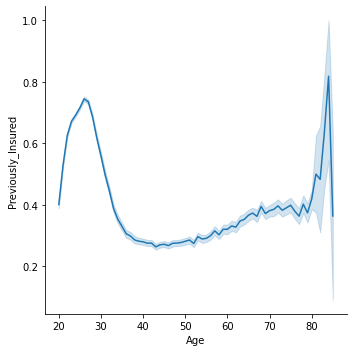

In [8]:
sns.relplot(data=df,x='Age',y='Previously_Insured',kind='line')

In [ ]:
df1=df.groupby(['Vehicle_Age','Response'])['id'].count().to_frame().rename(columns={'id':'count'}).reset_index()

sns.catplot(x="Vehicle_Age", y="count",col="Response",data=df1, kind="bar",height=4, aspect=.7);

In [ ]:
print(df1)

# Data Preprocessing - Encoding

In [8]:
#mapping male to 1 and female to 0
d = {'Male': 1, 'Female': 0}
df['Gender'] = df['Gender'].map(d)

In [9]:
#mapping yes to 1 and no to 0
d = {'Yes': 1, 'No': 0}
df['Vehicle_Damage'] = df['Vehicle_Damage'].map(d)

In [10]:
#mapping vehicle age
d = {'> 2 Years': 2, '1-2 Year': 1, '< 1 Year': 0}
df['Vehicle_Age'] = df['Vehicle_Age'].map(d)

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)

In [9]:
#Highly correlated columns wrt to target columns which can give us better accuracy
hig_corr = df.corr()
hig_corr_features = list(hig_corr.index[abs(hig_corr["Response"]) >= 0.2])
hig_corr_features

['Previously_Insured', 'Response']

In [10]:
for col in df.columns:
    if col == 'Response':
        continue
    print(f"{col}: {df[col].corr(df['Response'])}\n")

id: -0.0013681501902185374



TypeError: unsupported operand type(s) for /: 'str' and 'int'

# Modeling

In [18]:
bool([i for i in hig_corr_features] == hig_corr_features)

True

In [24]:
X = df[hig_corr_features].copy()
y = df[['Response']].copy()

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=40,test_size=.2)
print(X_train.shape)
print(X_test.shape)

(304887, 4)
(76222, 4)


In [26]:
insurance_classifier = tree.DecisionTreeClassifier(max_leaf_nodes=len(X.columns), random_state=0)
insurance_classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=4, random_state=0)

In [27]:
predictions = insurance_classifier.predict(X_test)

In [28]:
accuracy_score(y_true = y_test, y_pred = predictions)

1.0

In [29]:
predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [30]:
confusion_matrix(y_true = y_test, y_pred = predictions)

array([[66709,     0],
       [    0,  9513]], dtype=int64)

### Linear Regression

In [31]:
log_mod = LogisticRegression(max_iter=10000)
log_mod.fit(X_train,y_train.values.ravel())
y_pred = log_mod.predict(X_test)


In [32]:
print("F1_score :",f1_score(y_test,y_pred,average='micro'))
print('\n')
print("Accuracy score :",accuracy_score(y_test,y_pred))
print('\n')
print("Confusion_matrix :\n",confusion_matrix(y_test,y_pred))

F1_score : 1.0


Accuracy score : 1.0


Confusion_matrix :
 [[66709     0]
 [    0  9513]]


### Random Forest Classifier

In [33]:
rf_mod = RandomForestClassifier(random_state=40)
rf_mod.fit(X_train,y_train.values.ravel())

y_pred = rf_mod.predict(X_test)

In [34]:
print(f'Accuracy Score: {(accuracy_score(y_test,y_pred))*100} %')
print('\n')
print("Classification Report is: \n",classification_report(y_test,y_pred))
print('\n')
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred))
print('\n')
print("Training Score: ",rf_mod.score(X_test,y_test)*100)
print('\n')
print("Mean Squared Error: ",mean_squared_error(y_test,y_pred))
print('\n')

print(rf_mod.get_params())

Accuracy Score: 100.0 %


Classification Report is: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     66709
           1       1.00      1.00      1.00      9513

    accuracy                           1.00     76222
   macro avg       1.00      1.00      1.00     76222
weighted avg       1.00      1.00      1.00     76222



Confusion Matrix: 
 [[66709     0]
 [    0  9513]]


Training Score:  100.0


Mean Squared Error:  0.0


{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 40, 'verbose': 0, 'warm_start': False}


### Gradient Boosting Classifier

In [35]:
grad_mod = GradientBoostingClassifier()
grad_mod.fit(X_train,y_train.values.ravel())
y_pred = grad_mod.predict(X_test)

In [36]:
print(f'Accuracy Score: {(accuracy_score(y_test,y_pred))*100} %')
print('\n\n')
print("Classification Report is: \n",classification_report(y_test,y_pred))
print('\n\n')
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred))
print('\n\n')
print("Training Score: ",grad_mod.score(X_test,y_test)*100)
print('\n\n')
print("Mean Squared Error: ",mean_squared_error(y_test,y_pred))
print('\n\n')

print(grad_mod.get_params())
print('\n\n')

Accuracy Score: 100.0 %



Classification Report is: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     66709
           1       1.00      1.00      1.00      9513

    accuracy                           1.00     76222
   macro avg       1.00      1.00      1.00     76222
weighted avg       1.00      1.00      1.00     76222




Confusion Matrix: 
 [[66709     0]
 [    0  9513]]



Training Score:  100.0



Mean Squared Error:  0.0



{'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'random_state': None, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}





# Model Fine Tuning

In [ ]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(grad_mod, random_state=1).fit(X_train, y_train)
eli5.show_weights(perm, feature_names = X_train.columns.tolist())